In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [78]:
#read the csv file from kaggle
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [79]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [80]:
#checked for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [81]:
#checked for duplicates
df.duplicated().sum()

0

In [82]:
#dropped serial number as it is not relevant to our prediction
df.drop(['Serial No.'],axis = 1,inplace = True)

In [83]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [84]:
#split data into target variables and features
X = df.drop(['Chance of Admit '],axis =1)
y = df['Chance of Admit ']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
#split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [87]:
X_train.shape

(400, 7)

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaler = MinMaxScaler()

In [90]:
#scaled train and test data using min_max scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [92]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [93]:
model = Sequential()

#first hidden layer contains 7 nodes with 7 inputs as features
model.add(Dense(7,activation = 'relu',input_dim = 7))
#output layer uses the linear activation function
model.add(Dense(1,activation = 'linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
#there are 64 parameters in our model
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [95]:
#the loss function we are using is mean_squared_error
model.compile(loss='mean_squared_error',optimizer='Adam')

In [96]:
#training on 15 epochs with validation split of 20%
history = model.fit(X_train_scaled,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.8375 - val_loss: 1.6919
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5183 - val_loss: 1.4370
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2256 - val_loss: 1.2072
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1089 - val_loss: 0.9996
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8578 - val_loss: 0.8185
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7406 - val_loss: 0.6558
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5726 - val_loss: 0.5171
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4616 - val_loss: 0.3991
Epoch 9/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3643 - val_loss: 0.3006
Epoch 10/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2724 - val_loss: 0.2201
Epoch 11/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1938 - val_loss: 0.1555
Epoch 12/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1442 - val_l

In [97]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [101]:
#GOT AN R2 SCORE of 0.05
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.051055452323426564

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

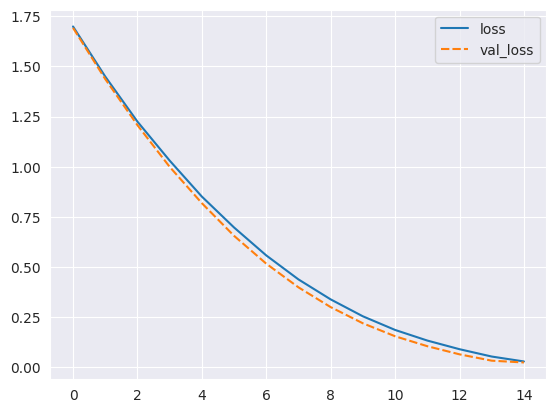

In [103]:
#plot between loss and validation loss 
sns.set_style('darkgrid')
sns.lineplot(history.history)